<a href="https://colab.research.google.com/github/t-willi/Simula/blob/main/AE_v7_WB_ecg_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from timeit import default_timer as timer 
import glob
import torch.optim as optim
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from random import shuffle

import requests
import zipfile
from pathlib import Path
!pip install ecg_plot

if torch.cuda.is_available()==True:
  device="cuda:0"
else:
  device ="cpu"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [5]:
!pip install wandb -qq
import wandb
wandb.login()
run = wandb.init(project="setup_weights and biases", job_type="download")


     |████████████████████████████████| 1.9 MB 20.6 MB/s 
     |████████████████████████████████| 162 kB 85.9 MB/s 
     |████████████████████████████████| 182 kB 86.1 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 162 kB 83.9 MB/s 
     |████████████████████████████████| 158 kB 82.1 MB/s 
     |████████████████████████████████| 157 kB 75.2 MB/s 
     |████████████████████████████████| 157 kB 88.9 MB/s 
     |████████████████████████████████| 157 kB 94.9 MB/s 
     |████████████████████████████████| 157 kB 73.3 MB/s 
     |████████████████████████████████| 157 kB 71.9 MB/s 
     |████████████████████████████████| 157 kB 72.0 MB/s 
     |████████████████████████████████| 157 kB 51.1 MB/s 
     |████████████████████████████████| 156 kB 61.6 MB/s 


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: twilli (ecg_simula). Use `wandb login --relogin` to force relogin


In [6]:
data = run.use_artifact("ecg_25000.zip:latest")
data=data.download()

wandb: Downloading large artifact ecg_25000.zip:latest, 1383.92MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:17.6


In [7]:
# Setup path to data folder
data_path = Path("data/")
train_path = data_path / "train_data"


# If the image folder doesn't exist, download it and prepare it... 
if train_path.is_dir():
    print(f"{train_path} directory exists.")
else:
    print(f"Did not find {train_path} directory, creating one...")
    train_path.mkdir(parents=True, exist_ok=True)

    # Unzip pizza, steak, sushi data
with zipfile.ZipFile("/content/artifacts/ecg_25000.zip:v0/ecg_25000.zip", "r") as zip_ref:
    print(f"Unzipping data to folder...") 
    zip_ref.extractall(train_path)

Did not find data/train_data directory, creating one...
Unzipping data to folder...


In [8]:
data_dir="/content/data/train_data"
files= glob.glob(data_dir + '/*.asc')


In [9]:
import random
limit=len(files)
#rand_idx=random.randint(0,limit)
data=files[49]
df=pd.read_csv(data,sep=" ",names=["1","2","v1","v2","v3","v4","v5","v6"])


1573


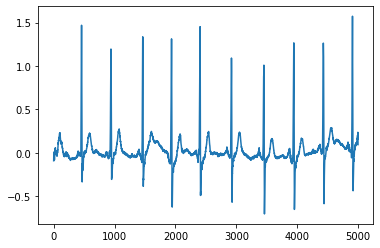

In [10]:
lead1=df['v4']/1000
maximum=max(lead1)
print(df.max().max())
plt.plot(lead1)

In [11]:
def find_max_min(data_dir=None):
  """
  This takes a directory of pd.read_csv readable data and intterates trough all,
  finding the global max and min
  """
  from tqdm.auto import tqdm
  max_list=[]
  min_list=[]
  #data_dir_train = "/content/data/train_data/sub_data/train"
  files=glob.glob(data_dir + '/*.asc')
  #files_train=glob.glob(data_dir_train + '/*.asc')
  #files=[*files_test,*files_train]
  for file in tqdm(files):
    temp_df=pd.read_csv(file,sep=" ",names=["1","2","v1","v2","v3","v4","v5","v6"])
    maximum=temp_df.max().max()
    minimum=temp_df.min().min()
    max_list.append(maximum)
    min_list.append(minimum)
    maximum=max(max_list)
    minimum=min(min_list)
  return(maximum,minimum)
  

In [12]:
data_dir_test="/content/data/train_data"
find_max_min(data_dir_test)

  0%|          | 0/25000 [00:00<?, ?it/s]

(5011, -3972)

In [13]:
# df_ptl=pd.read_csv("/content/ptbxl_database.csv")
# is_normal=df_ptl["report"]=="sinusrhythmus normales ekg"
# df_normal=df_ptl[is_normal]
# df_ptl_filtered=df_normal.loc[:,["report","r_peaks"]]
# df_ptl_filtered.reset_index(inplace=True)
# r_peaks=df_ptl_filtered["r_peaks"]
# r_peaks[0]


In [14]:
# peak_lis = []
# for i in range(len(r_peaks)):
#   peaks=r_peaks[i][1:-1]
#   peaks=peaks.split(" ")
#   peaks=peaks[1:-1]
#   new_peak=[]
#   for peak in peaks:
#     if peak != "":
#       new_peak.append(int(peak))
#   new_peak
#   peak_lis.append(new_peak)
# peak_lis[0][0]

  



   

In [15]:
# len(peak_lis)
# list_of_max_ptb=[]
# for i in range(len(peak_lis)):
#   maximum=max(peak_lis[i])
#   list_of_max_ptb.append(maximum)


In [16]:
# max_list[0:10],list_of_max_ptb[0:10]

In [17]:
# fig, axs = plt.subplots(2)
# fig.suptitle("Maximum values from synthetic data and ptb data")
# fig.tight_layout(pad=5.0)
# axs[0].plot(max_list)
# axs[0].set_title("Synthetic Data")
# axs[1].plot(list_of_max_ptb)
# axs[1].set_title("ptb-xl data")


In [18]:
# Create custom dataset class to load ECG data into dataset, containing 
# input tensor with lead 1 and output tensor with desired other leads
class Custom_dataset(Dataset):
  
    def __init__(self, data_dir,max_value=5011,column=3,split=False,target="train"):
      #get all files from directory loaded in all_files list
      self.column=column
      self.max_value=max_value
      #should shuffle the data here?
      self.files = glob.glob(data_dir + '/*.asc')
      self.len=len(self.files)
      self.cut1=int(self.len*0.8)
      self.cut2=int(self.len*0.9)
      self.train_files=self.files[0:self.cut1]
      self.test_files=self.files[self.cut1:self.cut2]
      self.val_files=self.files[self.cut2:self.len]
      self.target=target
      self.split=split

    def __len__(self):
      if self.split is True:
        if self.target is "train":
          return len(self.train_files)
        if self.target is "test":
          return len(self.test_files)
        if self.target is "val":
          return len(self.val_files)
      if self.split is not True:
        return len(self.files)

    def __getitem__(self,idx):
      header = ["1","2","v1","v2","v3","v4","v5","v6"]
      #turn list of dataframes into Tensor
      if self.split is True:
        if self.target is "train":
          temp_df=pd.read_csv(self.train_files[idx],sep=" ", names = header)
        if self.target is "test":
          temp_df=pd.read_csv(self.test_files[idx],sep=" ", names = header)
        if self.target is "val":
          temp_df=pd.read_csv(self.val_files[idx],sep=" ", names = header)
      if self.split is not True:
        temp_df=pd.read_csv(self.files[idx],sep=" ", names = header)
      temp_df/=self.max_value
      #load input tensor
      
      temp_list_in=temp_df.iloc[:,0]
      #temp_list_in=normalize([temp_list_in], norm="max")
      temp_tensor_in = torch.tensor(temp_list_in,dtype=torch.float32)
      temp_tensor_in=temp_tensor_in.unsqueeze(0)
      #load label Tensor
      temp_list_out=temp_df.iloc[:,1:9].values
      #temp_list_out=normalize([temp_list_out], norm="max")
      temp_tensor_out=torch.tensor(temp_list_out,dtype=torch.float32)
      temp_tensor_out=temp_tensor_out.unsqueeze(0)
      temp_tensor_out=torch.permute(temp_tensor_out,(0,2,1))
      #combine input and label and output
      temp_tensor_pair= temp_tensor_in,temp_tensor_out
      return temp_tensor_pair

In [19]:
data_dir="/content/data/train_data"
train_dataset = Custom_dataset(data_dir=data_dir,split=True,target="train")
test_dataset = Custom_dataset(data_dir=data_dir,split=True,target="test")
val_dataset = Custom_dataset(data_dir=data_dir,split=True,target="val")
len(train_dataset),len(test_dataset),len(val_dataset)

from torch.utils.data.dataloader import DataLoader
BATCH_SIZE = 128
#turn datasets into iterables
train_dataloader = DataLoader(train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              drop_last=True
                              )
val_dataloader = DataLoader(val_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                             drop_last=True
                              )

In [20]:
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 20,
  "batch_size": 128
}

In [21]:
"""
Here, we define the autoencoder model.This model is taken from "https://github.com/L1aoXingyu/pytorch-beginner/blob/master/08-AutoEncoder/simple_autoencoder.py"
"""
class ECG_AE_v1(nn.Module):
    def __init__(self,step1=128,step2=64,step3=20):
        super(ECG_AE_v1, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(5000,step1),
            nn.ReLU(),
            nn.Linear(step1,step2),
            nn.ReLU(),
            nn.Linear(step2,step3),
            nn.ReLU(),

        )
        self.decoder = nn.Sequential(

            nn.Linear(step3,step2),
            nn.ReLU(),
            nn.Linear(step2,step1),
            nn.ReLU(),
            nn.Linear(step1,35000),
        )


    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = ECG_AE_v1().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [22]:
model

ECG_AE_v1(
  (encoder): Sequential(
    (0): Linear(in_features=5000, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=20, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=35000, bias=True)
  )
)

In [23]:
# import random
# limit=len(val_dataset)
# rand_idx=random.randint(0,limit)
# X,y=val_dataset[rand_idx]
# K = torch.cat((X,y.squeeze()))
# K=K.numpy()
# input_df=pd.DataFrame(K).T
# input_df.columns = ["1","2","v1","v2","v3","v4","v5","v6"]


In [24]:
def get_pred(dataset=val_dataset):
  """
  Function takes a Tensor Dataset as input,first a random file from the dataset is selected,
  then the Tensor pair is recombined and shaped into a df-->df_Input. 
  X is used afterwards as input into the model. The predictions are safed as --> df_output.
  Both dataframes are now unscaled by 5011, the max value of the whole dataset.
  Then a tuple pair of input and output is returned.
  """
  import random
  limit=len(dataset)
  rand_idx=random.randint(0,limit)
  X,y=dataset[rand_idx]
  #need to combine tensors to make dataframe for plotting input and output side by side
  full_tensor=torch.cat((X,y.squeeze()))
  full_tensor=full_tensor.numpy()
  df_input=pd.DataFrame(full_tensor).T
  df_input.columns = ["R1","R2","Rv1","Rv2","Rv3","Rv4","Rv5","Rv6"]
  model.to("cpu")
  model.eval()
  with torch.inference_mode():
    output=model(X)
    output=torch.reshape(output,(5000, 7))
  output=output.detach().numpy()
  #unscale data
  df_output = pd.DataFrame(output,columns=["F2","Fv1","Fv2","Fv3","Fv4","Fv5","Fv6"])*5011
  df_input=df_input*5011
  return df_input,df_output

In [25]:
def get_img(df,epoch,path):
  df=df
  columns=df.columns
  fig,axs = plt.subplots(7,1,figsize=(50,15))
  #plt.figure(figsize=(10,6))
  plt.suptitle(f"leads 2 to 8 from epoch{epoch}",x=0.5, y=0.93, fontsize=17, fontweight='700')
  for i,column in enumerate(columns):
    axs[i].plot(df[column], 'g', linewidth=2)
    axs[i].set_title(f'Plot {i}: lead {column}', fontsize=15)
  plt.xlabel('X[time in Datapoints]', fontsize=15, fontweight='bold')
  plt.ylabel('Y[mV]', fontsize=15, y=1, fontweight='bold')
  fig.savefig(path)   # save the figure to file
  plt.close(fig)

In [26]:
def plotECG(df1=None,df2=None,title=None,pad_df2=True,Path=None):
  """
  takes two dataframes with identical columns, concats them and plots them as ecg using ecg_plot
  it also takes the first column of df1 and ads it to df1 if pad_df2 is True
  """
  index=["real1","realR2","realv1","realv2","realv3","realv4","realv5","realv6","real_lead1",
         "pred2","predv1","predv2","predv3","predv4","predv5","predv6"]
  import ecg_plot
  if pad_df2 is True:
    if len(df1.columns)>len(df2.columns):
      df2.insert(0, 'real_lead1', df1["R1"])
  frames=[df1/1000,df2/1000]
  df=pd.concat(frames,axis=1,join="outer",)
  ecg_plot.plot(df.values.T, sample_rate = 500,title = title,
                     lead_index = index )
  return df


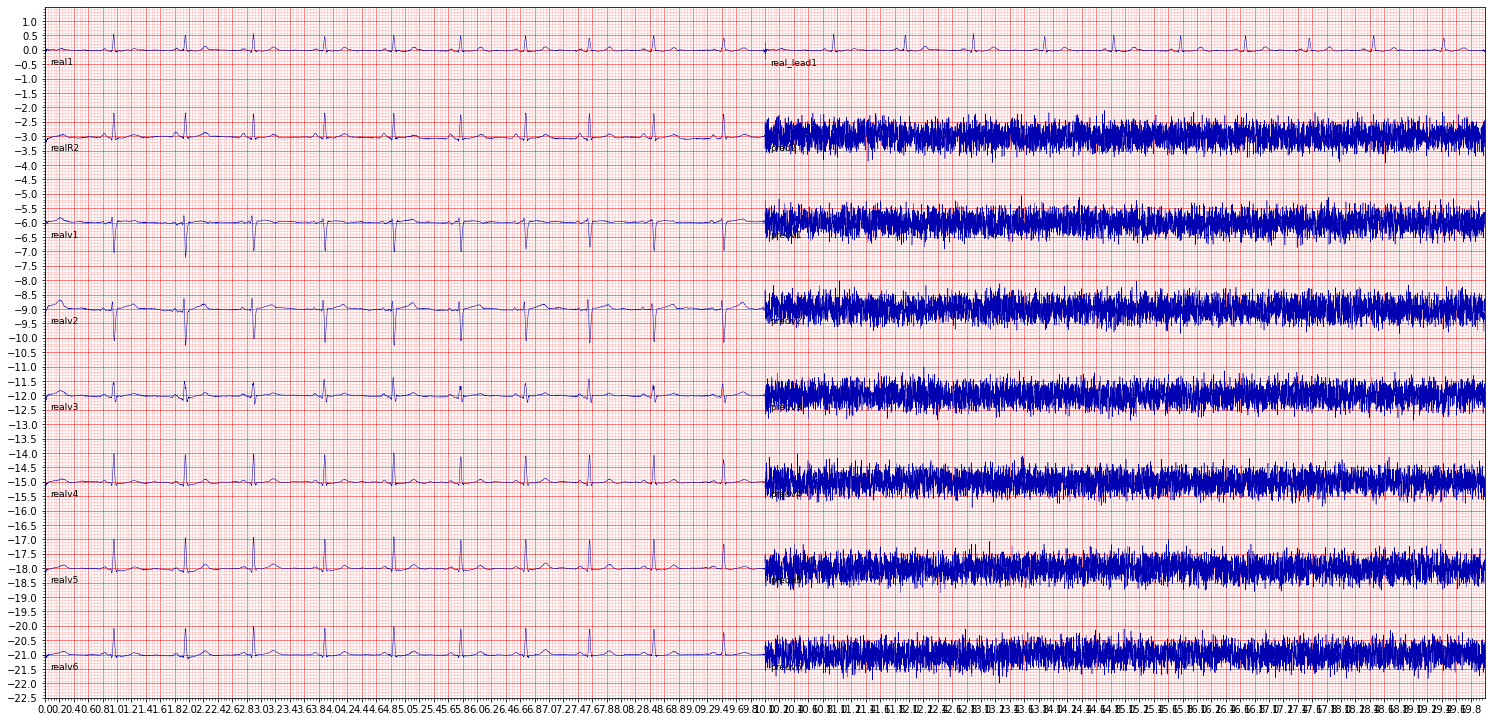

In [27]:
df1,df2=get_pred()
df=plotECG(df1,df2)

In [28]:
### You want to merge the input and the output dataframe along the column axis while keeping the index the same
### then you used the combined df to plot it with csv plot
### then clean up the code make sure it runs, you should probably send some of the functions to github

In [29]:
input,output=get_pred()
output/=1000
frames=[input,output]
result = pd.concat(frames)
result
# output=output.values.T
# input=input.values.T
# #µV to mv
# output /= 1000


,R1,R2,Rv1,Rv2,Rv3,Rv4,Rv5,Rv6,F2,Fv1,Fv2,Fv3,Fv4,Fv5,Fv6
0,-22.000000,-95.000000,8.0,7.000000,-44.0,-60.000000,-89.000008,-54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-33.000000,-110.000008,17.0,-17.000000,-61.0,-57.999996,-95.000000,-59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-26.000000,-121.000000,18.0,-28.999998,-76.0,-57.999996,-88.000000,-34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-28.000002,-145.000000,7.0,-54.000000,-63.0,-81.000000,-101.000000,-54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-9.000000,-139.000000,27.0,-24.000000,-43.0,-73.000000,-102.000000,-53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.548312,0.360652,-0.140164,-0.049750,-0.526336,0.158241,-0.475570
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.223036,-0.014103,-0.360243,-0.425913,0.136177,-0.072562,-0.274015
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005147,0.049633,-0.128404,-0.307548,-0.441376,0.302122,0.347631
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.133447,-0.079897,0.359561,0.407297,-0.476631,0.087136,-0.156352


In [30]:
model_path = Path("/content/model/output")
save=model_path/"model"
save

PosixPath('/content/model/output/model')

In [31]:
def train_model(Epochs=20,model=model,train_dataloader=train_dataloader,val_dataloader=val_dataloader,stop=False):
  MODEL_NAME = "AE_test_wb"
  cfg = wandb.config
  model_path = Path("/content/model/output")
  model_path.mkdir(parents=True, exist_ok=True)
  # epoch_count = []
  # test_count = []
  # train_count = []
  from tqdm.auto import tqdm
  #train and test loop
  for epoch in tqdm(range(Epochs)):
    print(f"Epoch:{epoch}")
    train_loss=0
    for batch, (X,y) in enumerate(tqdm(train_dataloader)):
      #print("doing train loop")
      X, y = X.to(device), y.to(device) 
      model.train()
      output=model(X)
      output=torch.reshape(output,(128, 1, 7, 5000))
      #print(output.shape,y.shape)
      loss = criterion(output,y)
      #print(loss)
      train_loss += loss
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if stop is not False:
        if batch == stop:
          break
      #print(train_loss)
    #average loss per batch
    train_loss /= len(train_dataloader)
    #start testing
    val_loss = 0
    model.eval()
    with torch.inference_mode():
      for batch,(X,y) in enumerate(val_dataloader):
        #print("doing test loop")
        X, y = X.to(device), y.to(device)
        val_pred = model(X)
        val_pred=torch.reshape(val_pred,(128, 1, 7, 5000))
        val_loss += criterion(val_pred,y)   
      if stop is not False:
        if batch == stop:
          break
      val_loss /= len(val_dataloader)
    #logging train and val los to w&b
    if epoch % 1 == 0:
      #print(f"\nTrain loss: {train_loss:.5f} |test_loss:{test_loss}" )
      # epoch_count.append(epoch)
      # test_count.append(test_loss.item())
      # train_count.append(train_loss.item())
      wandb.log({"train_loss": train_loss,
                "val_loss":val_loss})
      wandb.watch(model)
    #safing model to w%b
    if epoch % 1 == 0:
      model_path.mkdir(parents=True, exist_ok=True)
      torch.save(model.state_dict(),model_path/MODEL_NAME )
      trained_model_artifact = wandb.Artifact(
            MODEL_NAME, type="model",
            description="test run for w&b",
            metadata=dict(cfg))
      trained_model_artifact.add_dir(model_path)
      run.log_artifact(trained_model_artifact)
    #   training_progress = pd.DataFrame(
    # {'Epoch': epoch_count,
    #  'Train_loss': train_count,
    #  'Test_loss': test_count
    # })
    #   training_progress.to_csv("/content/gdrive/MyDrive/Simula/model_outcome/progress.csv")
    #saving prediction csv files and prediction img files to WB
    if epoch % 1 == 0:
      input,predictions = get_pred(test_dataset)
      predictions.to_csv(model_path/"prediction.csv")
      pred_table = wandb.Artifact("Prediction_table", type="Table")
      pred_table.add_file(model_path/"prediction.csv")
      run.log_artifact(pred_table)
      get_img(df=predictions,epoch=epoch,path=model_path/"img.png")
      img_artifact=wandb.Artifact("Prediction_Images",type="Image")
      img_artifact.add_file(model_path/"img.png")
      run.log_artifact(img_artifact)


      #predictions.to_csv(f"/content/gdrive/MyDrive/Simula/model_outcome/predictions{epoch}.csv")


In [35]:
# df1,df2=get_pred()
# plotECG(df1,df2)

In [34]:
train_model(20,stop=5)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch:0


  0%|          | 0/156 [00:00<?, ?it/s]

KeyboardInterrupt: ignored